Import Data

In [64]:
# Importing os for getting path names for data
import os
# Importing pandas 
import pandas as pd

In [65]:
data_path = os.path.join('data','zippedData')
files = os.listdir(data_path)

In [66]:
import_paths = [os.path.join(data_path,file) for file in files]

In [67]:
import_paths

['data/zippedData/imdb.title.crew.csv.gz',
 'data/zippedData/tmdb.movies.csv.gz',
 'data/zippedData/imdb.title.akas.csv.gz',
 'data/zippedData/imdb.title.ratings.csv.gz',
 'data/zippedData/imdb.name.basics.csv.gz',
 'data/zippedData/rt.reviews.tsv.gz',
 'data/zippedData/imdb.title.basics.csv.gz',
 'data/zippedData/rt.movie_info.tsv.gz',
 'data/zippedData/tn.movie_budgets.csv.gz',
 'data/zippedData/bom.movie_gross.csv.gz',
 'data/zippedData/imdb.title.principals.csv.gz']

In [68]:
data = {}
for path in import_paths:
    try:
        df = pd.read_csv(path) #this will fail on the .tsv
    except:
        df = pd.read_csv(path,delimiter='\t', encoding='unicode_escape')
    data[path.split('/')[-1]] = df

In [69]:
data['bom.movie_gross.csv.gz']

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [70]:
data['tmdb.movies.csv.gz']

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [71]:
file_rename_list = ['writer_director', #imdb.title.crew.csv.gz
                   'move_info',#tmdb.movies.csv.gz
                   'global_title',#imdb.title.akas.csv.gz
                   'rating_with_votes',#imdb.title.ratings.csv.gz'
                   'worked_in_film',#imdb.name.basics.csv.gz
                   'rotten_reviews',#rt.reviews.tsv.gz
                   'movie_basic_info',#imdb.title.basics.csv.gz
                   'rotten_movie_info',#rt.movie_info.tsv.gz
                   'budget_tn',#tn.movie_budgets.csv.gz
                   'boxoffice_bom',#bom.movie_gross.csv.gz
                   'character_title',#imdb.title.principals.csv.gz
                   ]

In [72]:
#getting movie title and genre from the df
df_test_info = data['tmdb.movies.csv.gz'].loc[:,['genre_ids','original_title']]

In [73]:
#changing column title to be the same with other df
df_test_info.rename(columns={'original_title':'title'},inplace=True) #df.rename(columns={"A": "a", "B": "c"})

In [74]:
#getting the title and gross into sep df
df_test_box = data['bom.movie_gross.csv.gz'].loc[:,['title','domestic_gross','foreign_gross']]

In [75]:
#merging the movie info with the gross income info
df_test_box_info = df_test_box.merge(df_test_info,how='left',on='title') 

In [76]:
#getting rid of commas in the foreign gross column
df_test_box_info.foreign_gross = df_test_box_info.foreign_gross.str.replace(',','') 

In [77]:
df_test_box[(df_test_box.title == "Marvel's The Avengers")]

,title,domestic_gross,foreign_gross
727,Marvel's The Avengers,623400000.0,895500000


In [78]:
#changing foreign gross from string to float
df_test_box_info.foreign_gross = df_test_box_info.foreign_gross.astype(float)

In [79]:
# making new column of total gross
#dom_gross = df_test_box_info['domestic_gross']
df_test_box_info['total_gross'] = df_test_box_info['domestic_gross'] + df_test_box_info['foreign_gross']

In [80]:
df_test_box.iloc[750:752]

,title,domestic_gross,foreign_gross
750,Journey 2: The Mysterious Island,103900000.0,231400000
751,The Expendables 2,85000000.0,229900000


In [81]:
df_test_box_info = df_test_box_info.sort_values(by='total_gross',ascending=False)

In [82]:
df_test_box_info.drop_duplicates(subset='title',inplace = True)

In [83]:
genre_id_to_string = {28:'action',
                      16:'animated',
                      99:'documentary',
                      18:'drama',
                      10751:'family',
                      14:'fantasy',
                      36:'history',
                      35:'comedy',
                      10752:'war',
                      80:'crime',
                      10402:'music',
                      9648:'mystery',
                      10749:'romance',
                      878:'sci-fi',
                      27:'horror',
                      10770:'TV-movie',
                      53:'thriller',
                      37:'western',
                      12:'adventure'}

In [84]:
df_test_box_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3386 entries, 751 to 3722
Data columns (total 5 columns):
title             3386 non-null object
domestic_gross    3358 non-null float64
foreign_gross     2037 non-null float64
genre_ids         1944 non-null object
total_gross       2009 non-null float64
dtypes: float64(3), object(2)
memory usage: 158.7+ KB


In [85]:
df_test_box_info.dropna(subset=['genre_ids'],inplace=True)

In [86]:
def convert_id_to_name(id_list):
    id_list = id_list[1:-1].replace(',','').split()
    for id in enumerate(id_list):
        id_list[id[0]] = genre_id_to_string[int(id[1])]
    return(id_list)


In [87]:
df_test_box_info.genre_ids = df_test_box_info.genre_ids.apply(lambda x: 'nan' if str(x) == 'nan' else convert_id_to_name(x))

In [136]:
df_test_box_info.dropna(subset=['total_gross'],inplace=True)

In [137]:
df_test_box_info

,title,domestic_gross,foreign_gross,genre_ids,total_gross
1957,Avengers: Age of Ultron,459000000.0,946400000.0,"[action, adventure, sci-fi]",1.405400e+09
3393,Black Panther,700100000.0,646900000.0,"[action, adventure, fantasy, sci-fi]",1.347000e+09
2999,Star Wars: The Last Jedi,620200000.0,712400000.0,"[fantasy, adventure, sci-fi, action]",1.332600e+09
3394,Jurassic World: Fallen Kingdom,417700000.0,891800000.0,"[action, adventure, sci-fi]",1.309500e+09
1171,Frozen,400700000.0,875700000.0,[thriller],1.276400e+09
...,...,...,...,...,...
2929,Troublemakers: The Story of Land Art,29500.0,9100.0,[documentary],3.860000e+04
329,Daddy Longlegs,21800.0,11500.0,"[drama, comedy]",3.330000e+04
332,Picture Me,12000.0,10400.0,[documentary],2.240000e+04
1154,Cirkus Columbia,3500.0,9500.0,"[comedy, drama, romance]",1.300000e+04


In [138]:
counter_dict = {}
for item in df_test_box_info.iterrows():
    ids = list(item[1])[-2]
    money = list(item[1])[-1]
    if ids != 'nan':
        for id in ids:
            if id in counter_dict.keys():
                counter_dict[id] += money
            else:
                counter_dict[id] = money

In [141]:
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 19 artists>

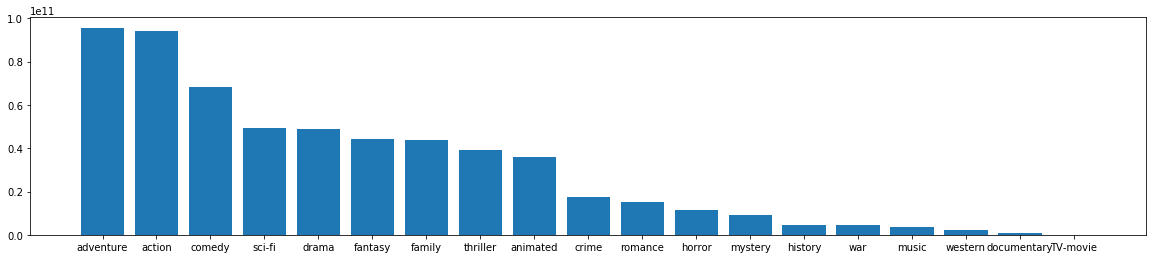

In [159]:
x = []
y = []
for item in sorted(counter_dict, key=counter_dict.get, reverse=True):
    x.append(item)
    y.append(counter_dict[item])
fig = plt.figure(figsize = (20,4))
ax = fig.subplots()
ax.bar(x,y)